In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [3]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [4]:
train = train_df.loc[:,["Open"]].values
train.shape

(1258, 1)

In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
train_scaled = scaler.fit_transform(train)

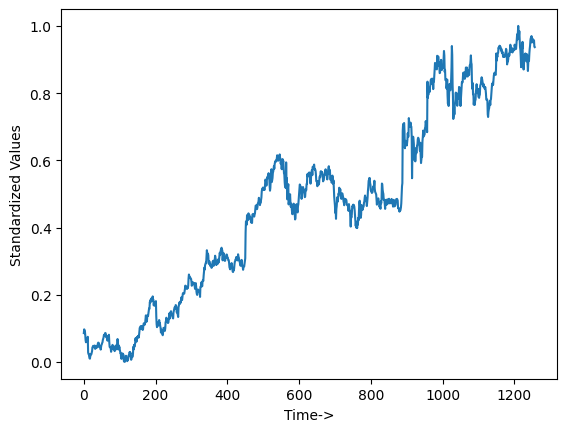

In [7]:
plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

In [8]:
#Create data structure to train model
#Taking reference of past 60 days to predict future stock price
#x_train will have data of 60 days prior to current date and y_train will have price on current date

x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape,y_train.shape


((1198, 60), (1198,))

In [65]:
x_train = np.reshape(x_train,shape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [52]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

model = Sequential()

model.add(SimpleRNN(units=100, activation='tanh', return_sequences=True,
input_shape=(x_train.shape[1], 1), recurrent_dropout=0.2))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=60, activation='tanh', return_sequences=False,recurrent_dropout=0.2))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])
model.summary()

C:\Users\Soham Padwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 60, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 60)                  │           9,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,921 (77.82 KB)

 Trainable params: 19,921 (77.82 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(x_train,y_train,epochs=50,batch_size=30,validation_split=0.05)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0011 - loss: 0.6299 - val_accuracy: 0.0167 - val_loss: 0.0123
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.2929 - val_accuracy: 0.0167 - val_loss: 0.0341
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.6736e-04 - loss: 0.2822 - val_accuracy: 0.0167 - val_loss: 0.0014
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 2.5013e-04 - loss: 0.2015 - val_accuracy: 0.0167 - val_loss: 0.0648
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.1711 - val_accuracy: 0.0167 - val_loss: 0.0082
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 4.4446e-04 - loss: 0.1340 - val_accuracy: 0.0167 - val_loss: 4.5733e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 9.1810e-04 - loss: 0.1280 - val_accuracy: 0.0167 - val_loss: 0.0117
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0012 - loss: 0.110

In [54]:
#Prepare test dataset
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [55]:
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(80,)

In [56]:
test_input = test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [57]:
test_scaled = scaler.transform(test_input)

In [58]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [59]:
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

C:\Users\Soham Padwal\AppData\Local\Temp\ipykernel_37528\2200062050.py:1: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))


(20, 60, 1)

In [60]:
y_test = test_df.loc[:,"Open"].values
y_test.shape

(20,)

In [61]:
#Model Prediction
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


In [62]:
y_pred = scaler.inverse_transform(y_pred)

In [63]:
output = model.evaluate(x=x_test,y=y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.0000e+00 - loss: 650638.0000


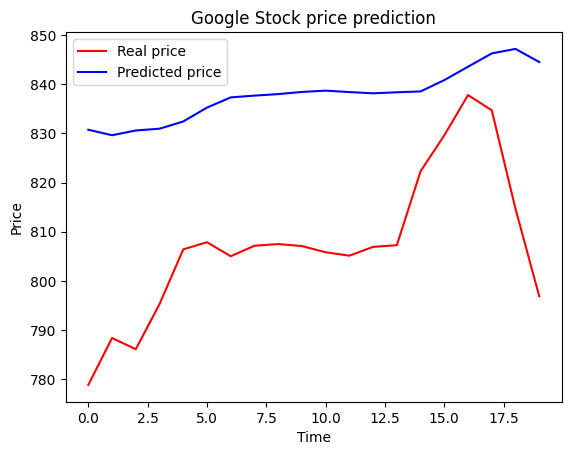

In [64]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error: 12.147129216190566
R² Score: 0.3210960564295805
